In [1]:
import os
import sys
sys.path.insert(0, '..')
import ccal
%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

import numpy as np
import pandas as pd

==================== Computational Cancer Analysis Library ====================
<15:30:08> Checking library dependencies ...
<15:30:08> Using the following libraries:
<15:30:08> 	scipy (v0.18.0)
<15:30:08> 	statsmodels (v0.6.1)
<15:30:08> 	scikit-learn (v0.17.1)
<15:30:08> 	seaborn (v0.7.1)
<15:30:08> 	rpy2 (v2.8.2)
<15:30:08> 	pandas (v0.18.1)
<15:30:08> 	matplotlib (v1.5.1)
<15:30:08> 	numpy (v1.11.1)
<15:30:08> Planted a random seed 20121020.


<15:30:43> Creating Onco-GPS with 750 samples, 9 components, and 17 states [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] ...


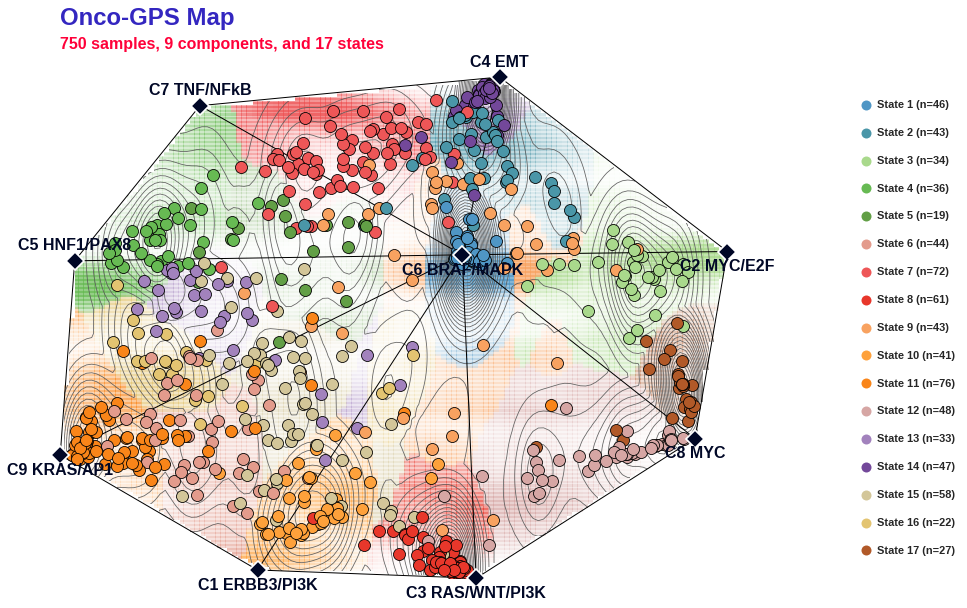

In [3]:
H = ccal.support.read_gct('/home/cyborg/Downloads/KRAS_Matrix.gct')

M = pd.read_csv('/home/cyborg/Downloads/KRAS_membership.gct', sep='\t')
k17 = M.ix[:, 'k_17']
states = []
for x in k17:
    if type(x) == str and x[0] == 'S':
        states.append(int(x[1:]))
    else:
        raise ValueError()
ccal.visualize.plot_onco_gps(H, states)
ccal.visualize.plot_onco_gps(H, states, annotations=np.random.random_sample(len(states)))

# Get states

In [ ]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
nclustering = 500
filename_prefix = 'output/ccle_hema_k_9_H_1000clustering_0828'

In [ ]:
labels, memberships, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename_prefix=filename_prefix)

# Map Onco-GPS

In [ ]:
labels = pd.read_csv(filename_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filename_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

In [ ]:
background = 1
for n_state in n_states_to_explore:
    states = labels.ix[n_state, :-1].astype(int).tolist()
    signature = 'metric'
    ccal.visualize.plot_onco_gps(h, states, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'not_metric'
    ccal.visualize.plot_onco_gps(h, states, mds_is_metric=False, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'populate_random'
    ccal.visualize.plot_onco_gps(h, states, annotations=annotations, background=background, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))